In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/FuelConsumptionCo2.csv')

In [3]:
df.columns

Index(['MODELYEAR', 'Brands', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [4]:
df.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.tail()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,SUV_SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,SUV_SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,SUV_SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,SUV_SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,SUV_STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [6]:
df.shape

(1067, 12)

In [7]:
df.isnull().sum()

,0
MODELYEAR,0
Brands,0
VEHICLECLASS,0
ENGINESIZE,0
CYLINDERS,0
TRANSMISSION,0
FUELTYPE,0
FUELCONSUMPTION_CITY,0
FUELCONSUMPTION_HWY,0
FUELCONSUMPTION_COMB,0


In [8]:
df.duplicated().sum()

np.int64(115)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop(['MODELYEAR'],axis=1,inplace=True)

In [12]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,3.320903,5.735294,13.244538,9.462185,11.546324,26.550420,255.278361
std,1.391885,1.756255,4.107981,2.828784,3.504167,7.524064,63.305538
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.300000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,250.000000
75%,4.000000,6.000000,15.300000,10.600000,13.200000,31.000000,292.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 1066
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brands                    952 non-null    object 
 1   VEHICLECLASS              952 non-null    object 
 2   ENGINESIZE                952 non-null    float64
 3   CYLINDERS                 952 non-null    int64  
 4   TRANSMISSION              952 non-null    object 
 5   FUELTYPE                  952 non-null    object 
 6   FUELCONSUMPTION_CITY      952 non-null    float64
 7   FUELCONSUMPTION_HWY       952 non-null    float64
 8   FUELCONSUMPTION_COMB      952 non-null    float64
 9   FUELCONSUMPTION_COMB_MPG  952 non-null    int64  
 10  CO2EMISSIONS              952 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 89.2+ KB


In [14]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [15]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Brands', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')

In [16]:
def plotHistogram(variable):
  plt.figure(figsize=(10,5))
  plt.hist(df[variable], bins=85, color="blue")
  plt.xlabel(variable)
  plt.ylabel("Frequency")
  plt.title(f"Data Frequency - {variable}")
  plt.show()

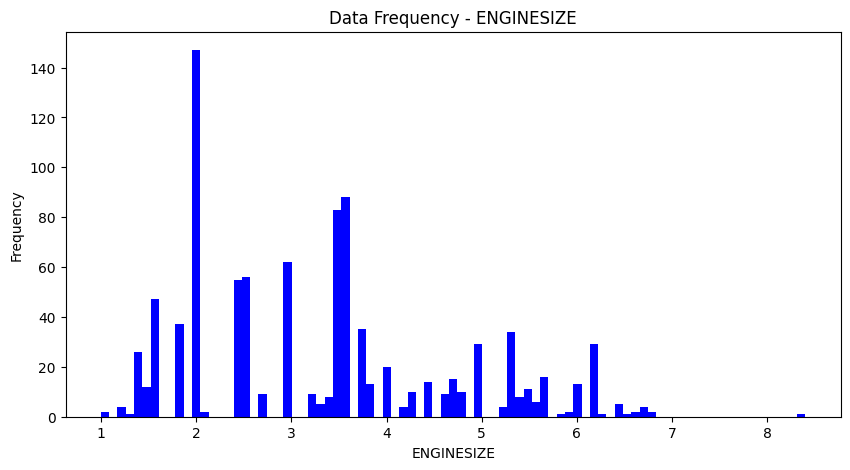

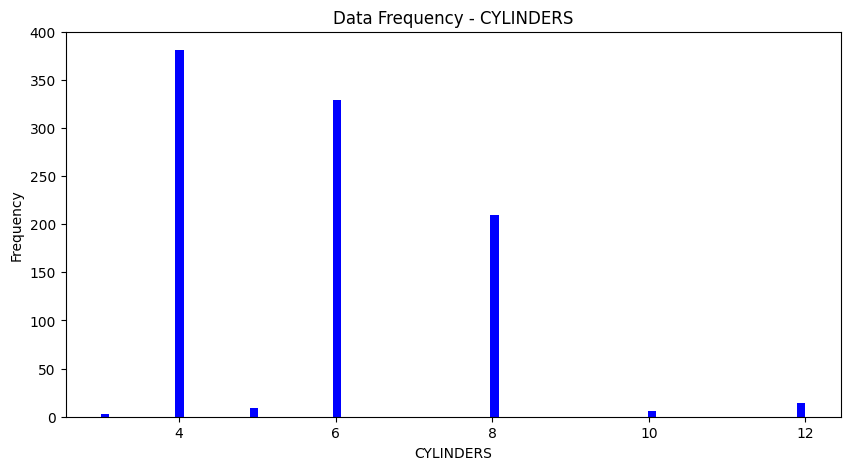

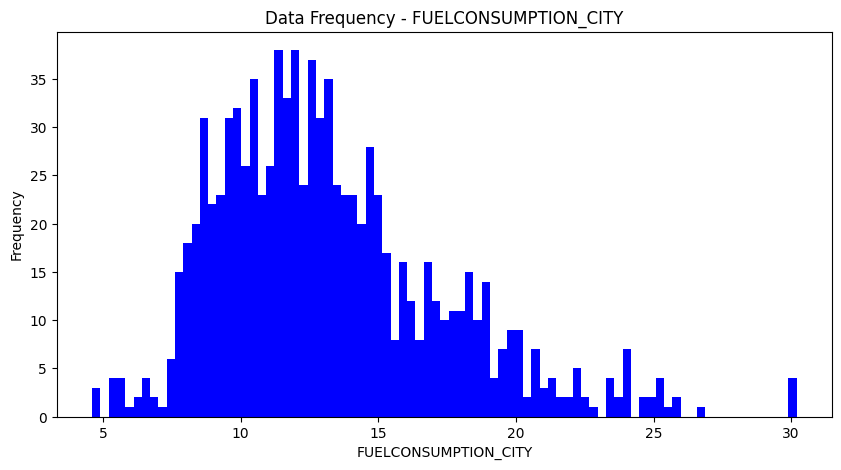

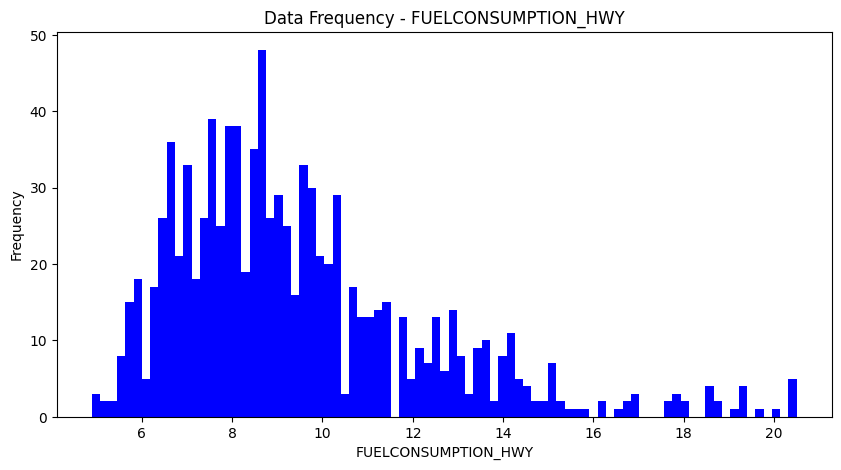

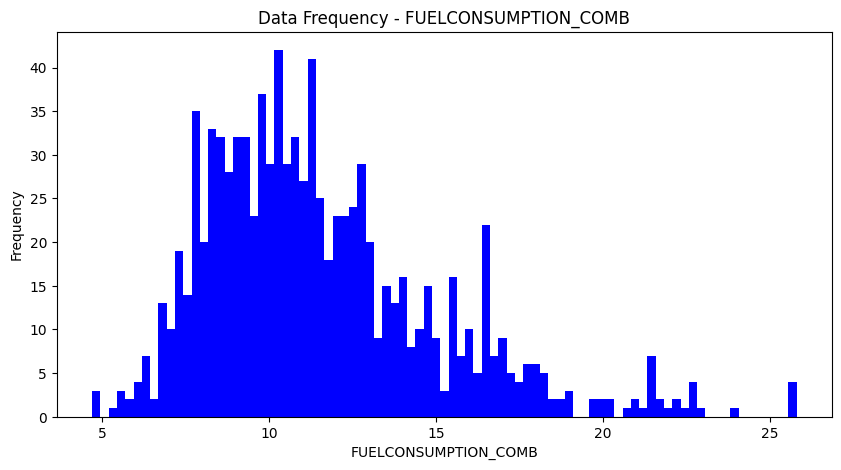

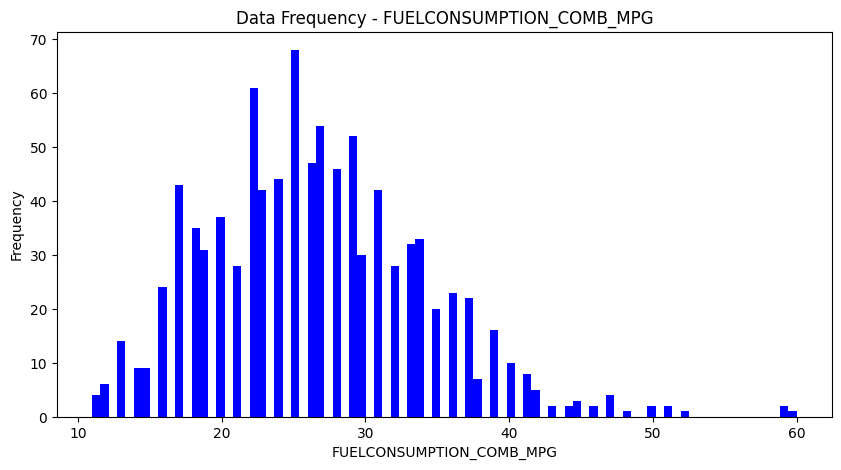

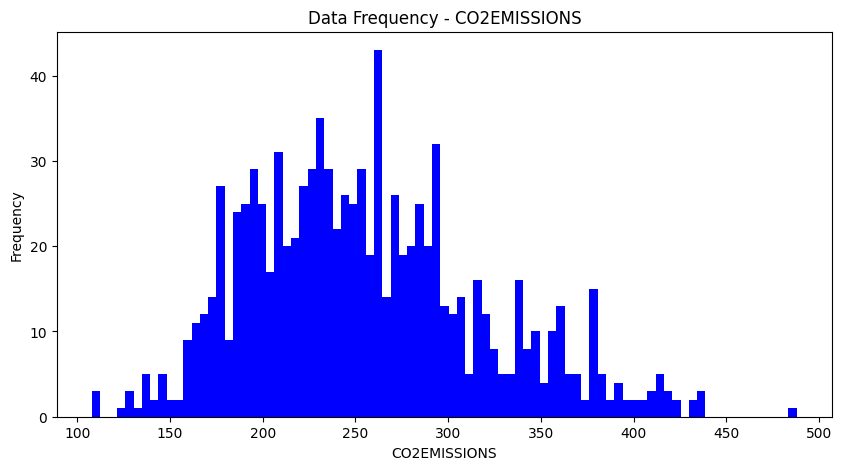

In [17]:
numerical_variables = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
plot_ = [plotHistogram(i) for i in numerical_variables]

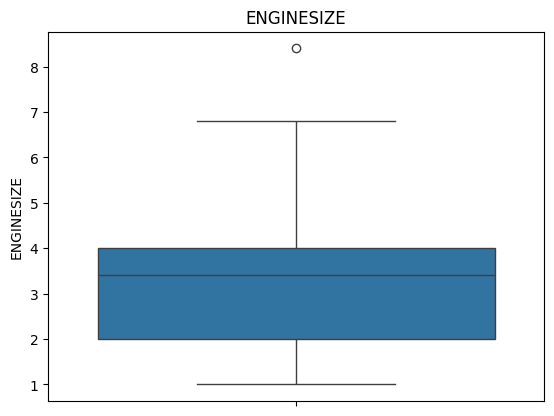

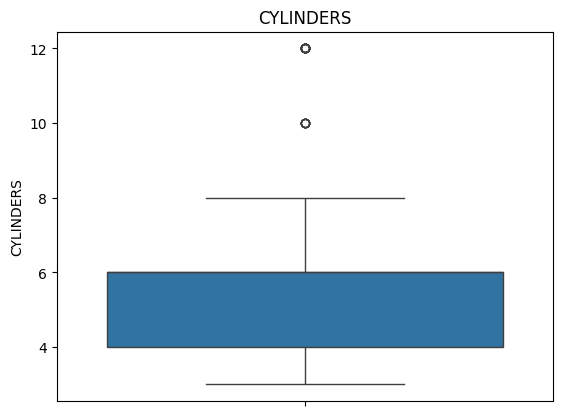

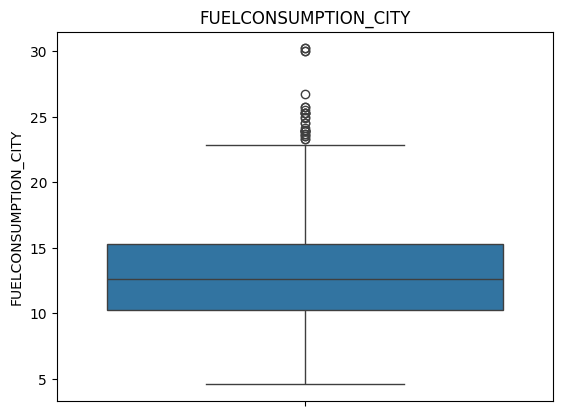

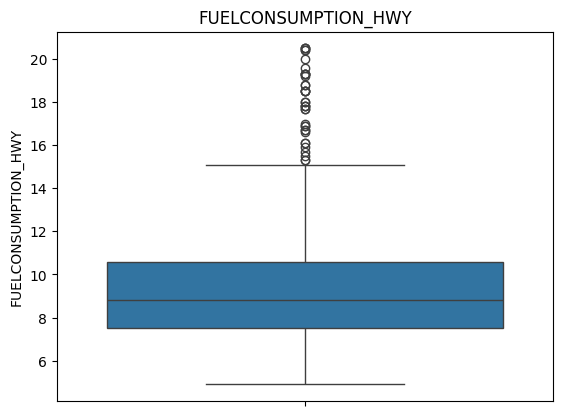

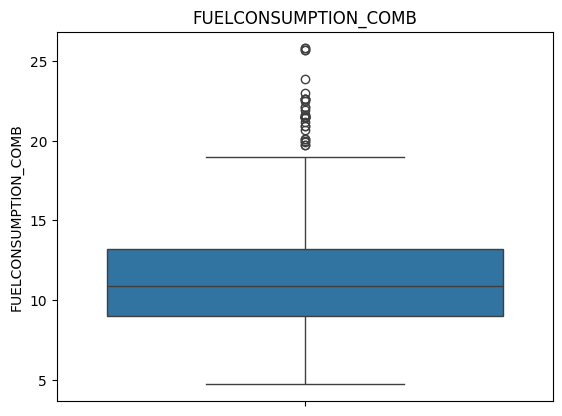

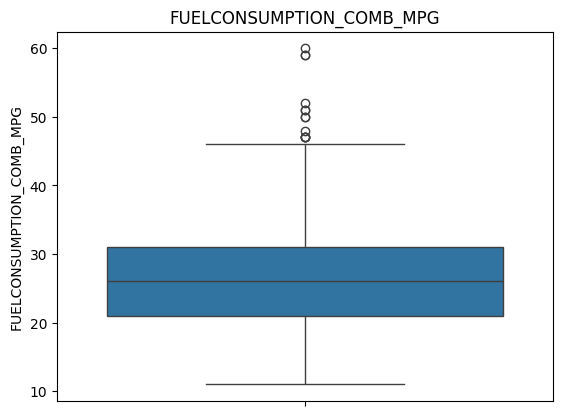

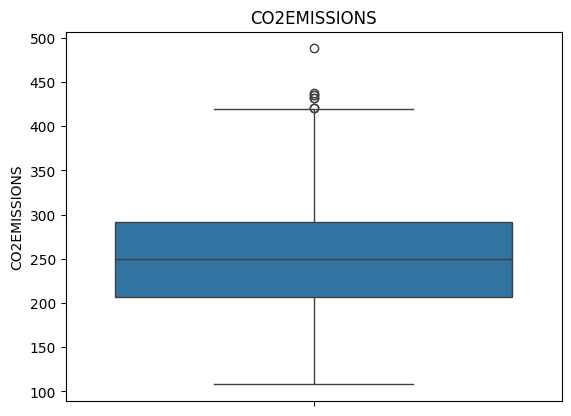

In [18]:
for i in num_cols:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [19]:
# Remove outliers using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Check new shape after removing outliers
print("New shape after removing outliers:", df.shape)

New shape after removing outliers: (866, 11)


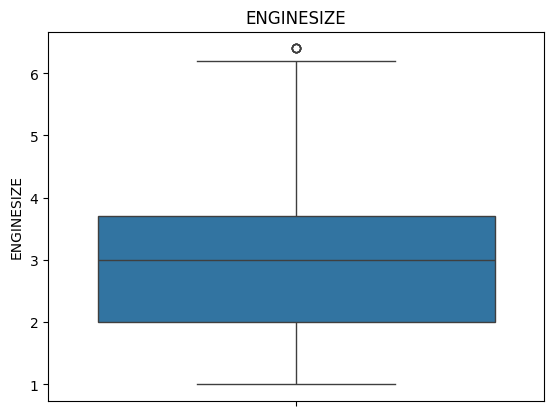

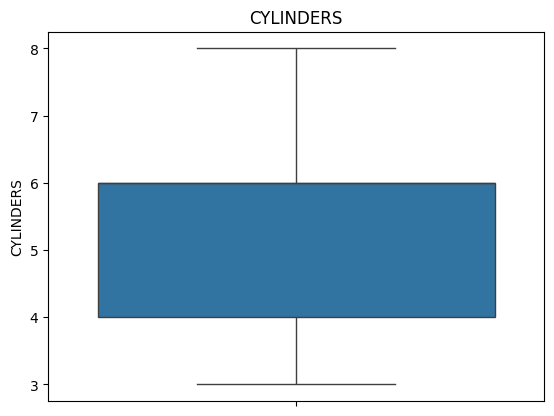

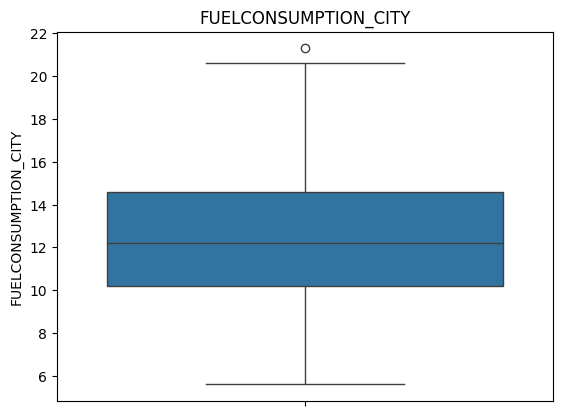

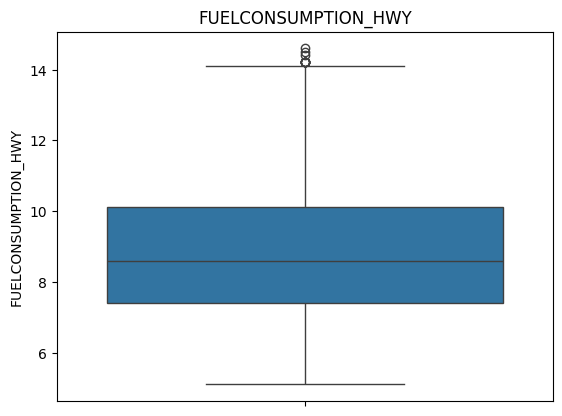

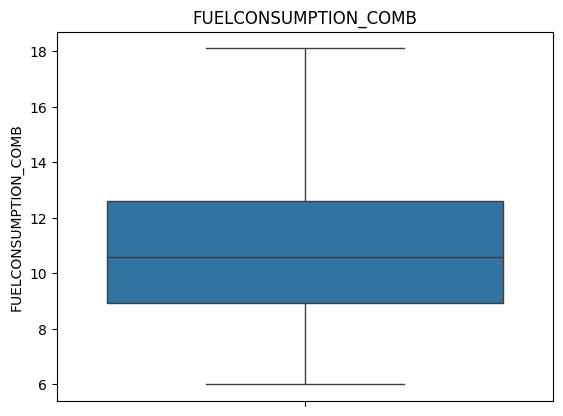

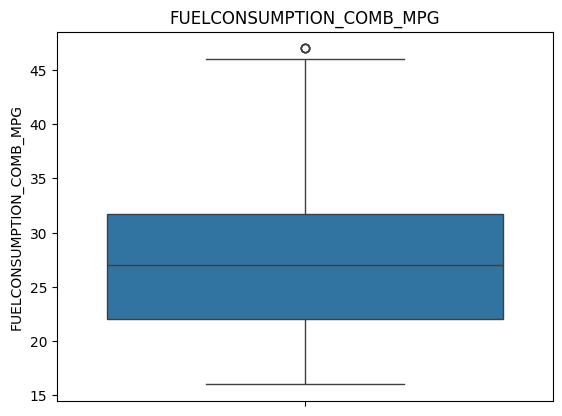

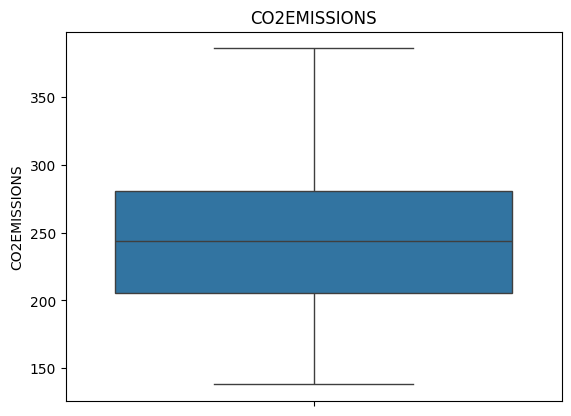

In [20]:
#boxplot for num columns
for i in num_cols:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [21]:
# Apply Winsorization (IQR capping) to each numeric column
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)  # Cap values outside range
print("Outliers have been capped using IQR method.")
df.shape

Outliers have been capped using IQR method.


(866, 11)

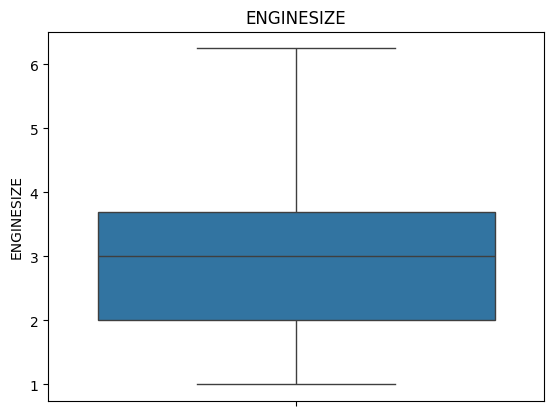

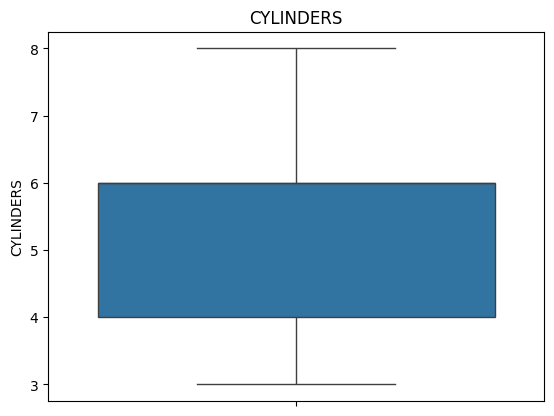

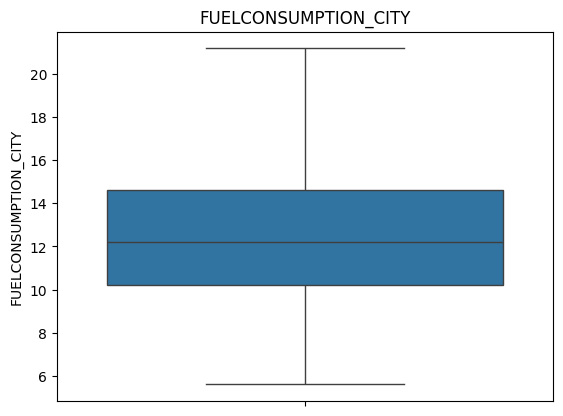

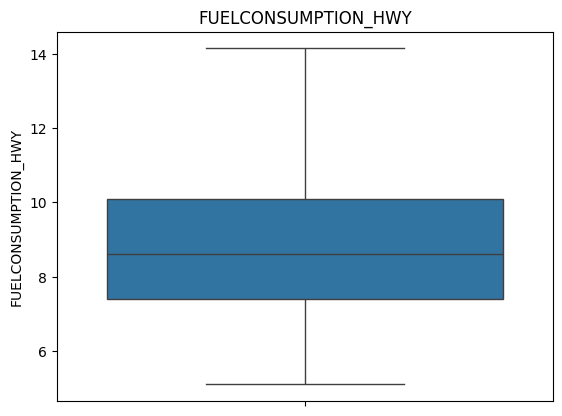

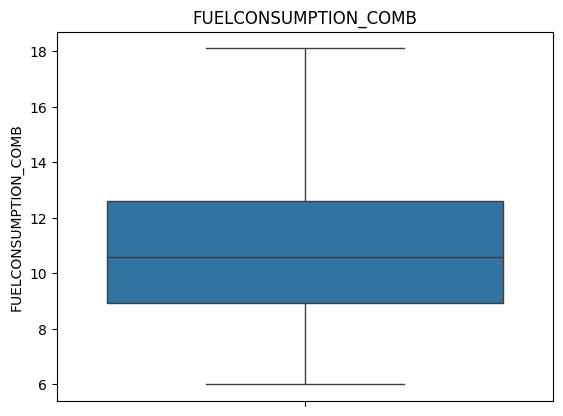

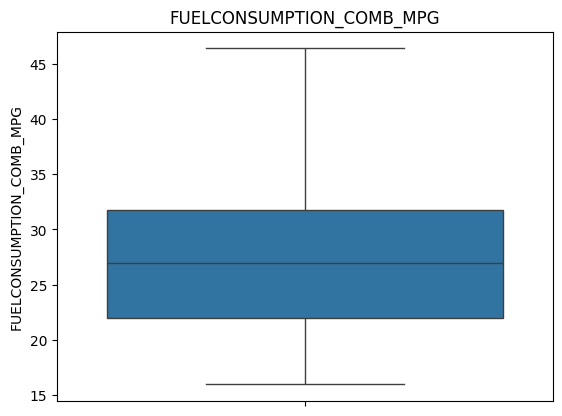

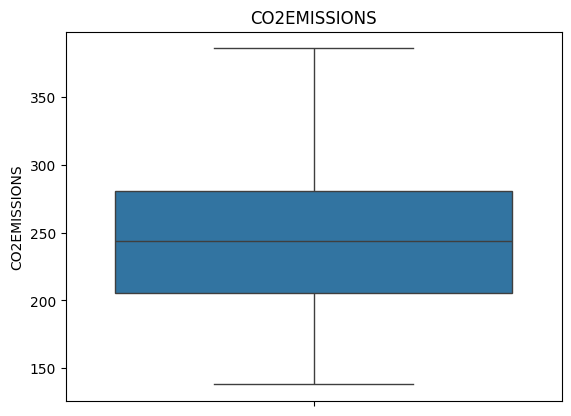

In [22]:
#boxplot for num columns
for i in num_cols:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

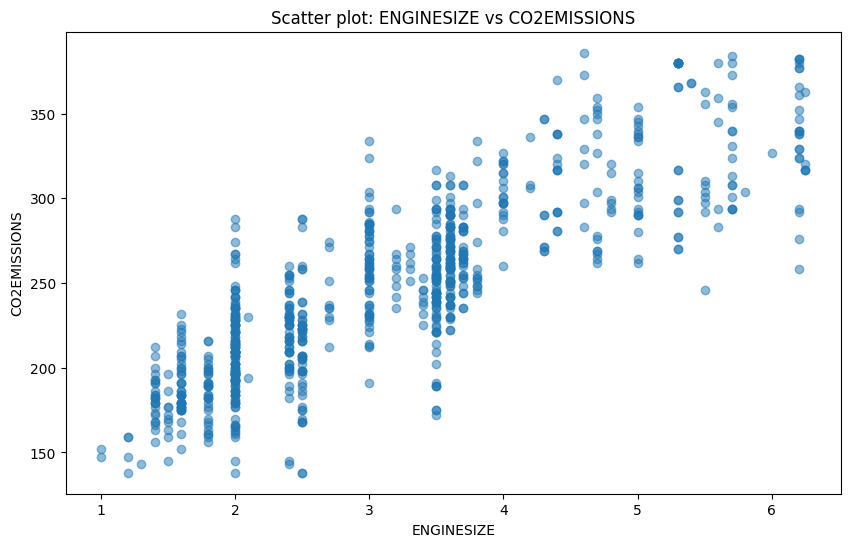

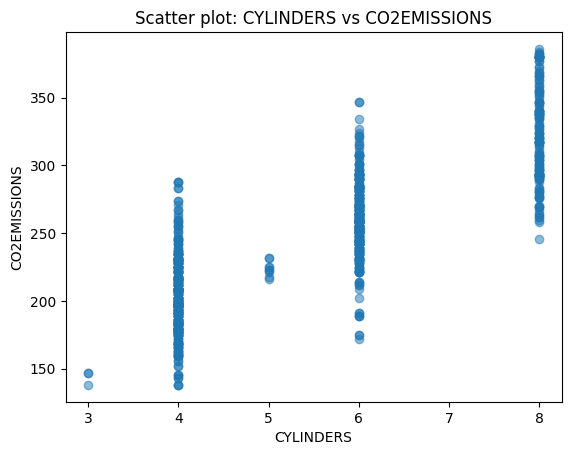

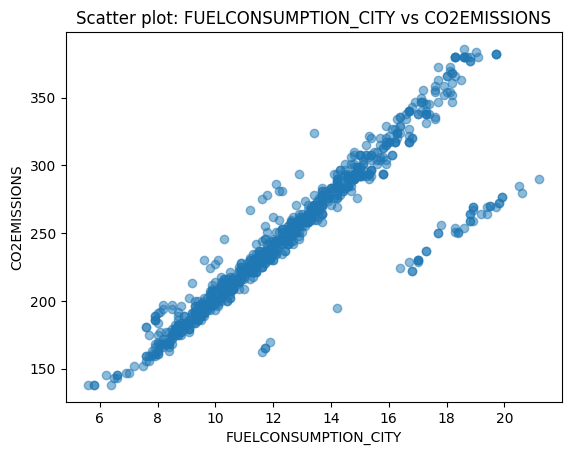

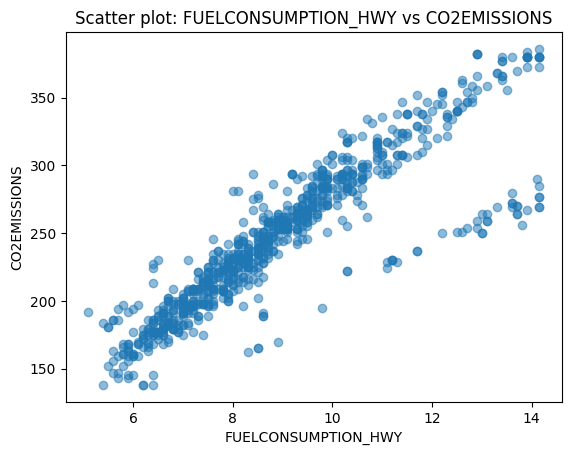

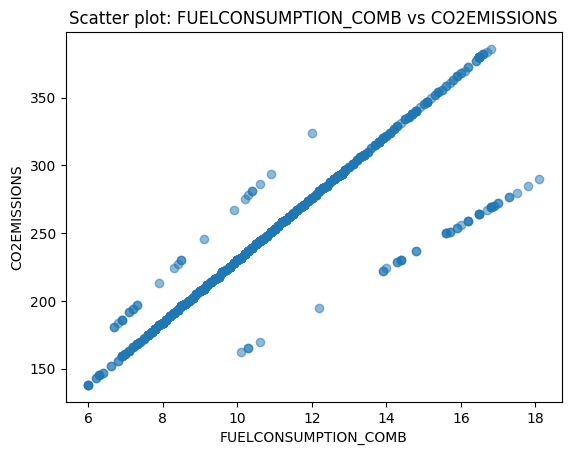

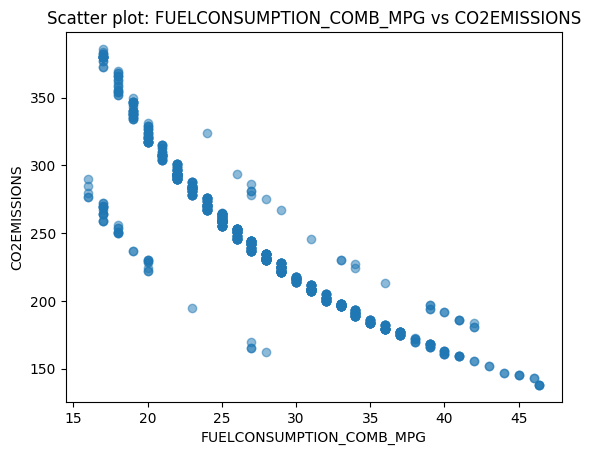

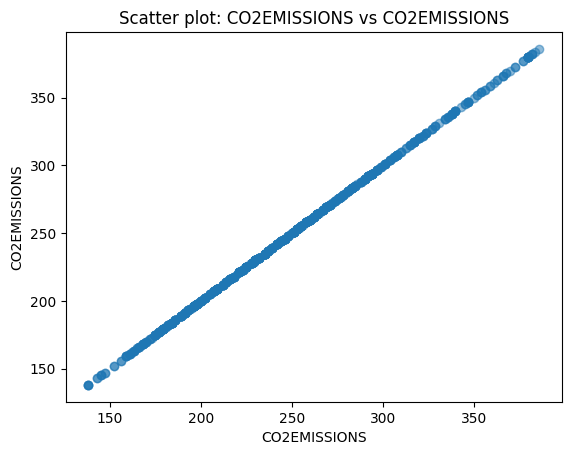

In [23]:
#scatter plot for numerical columns
plt.figure(figsize=(10, 6))
for col in num_cols:
    plt.scatter(df[col], df['CO2EMISSIONS'], alpha=0.5)
    plt.title(f"Scatter plot: {col} vs CO2EMISSIONS")
    plt.xlabel(col)
    plt.ylabel("CO2EMISSIONS")
    plt.show()

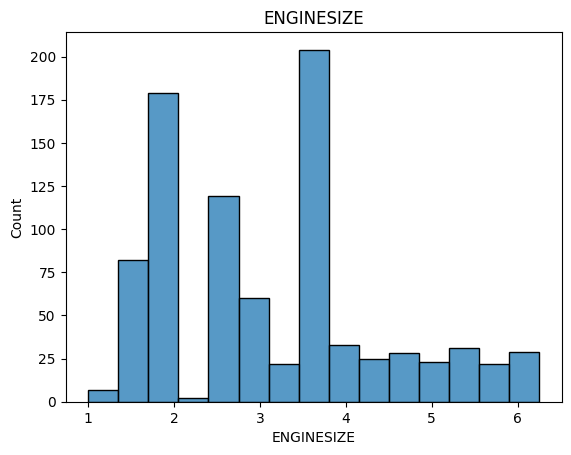

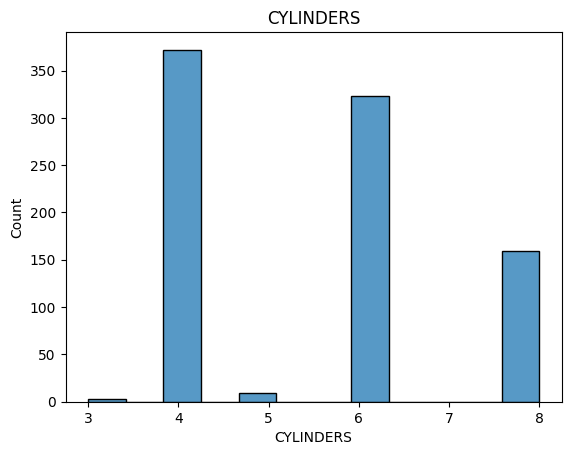

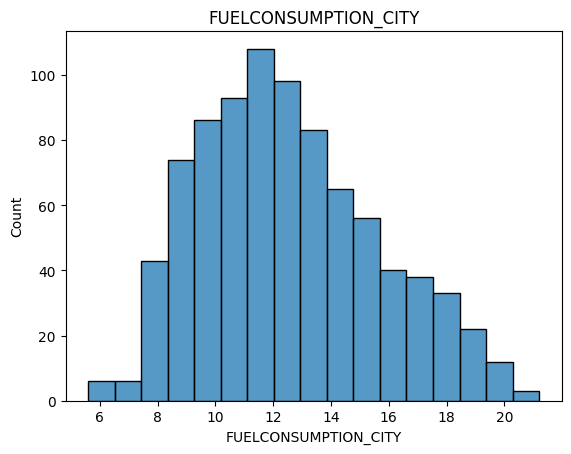

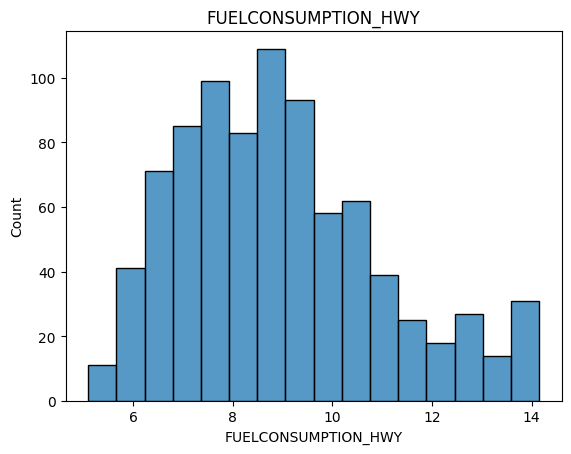

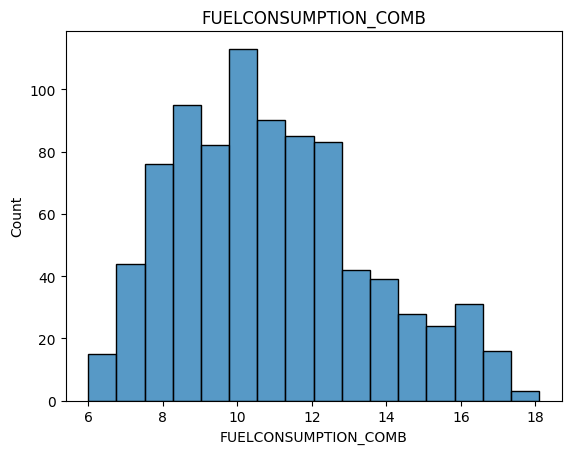

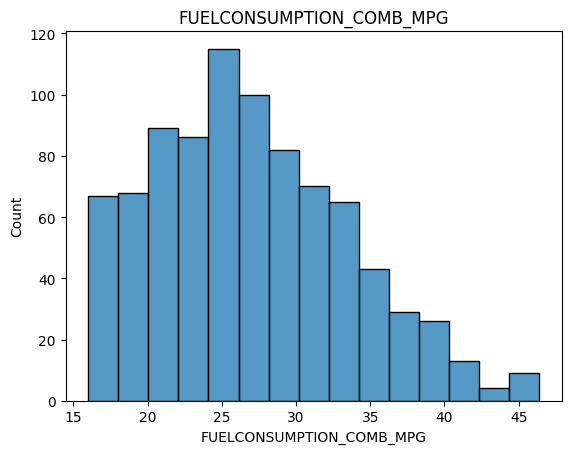

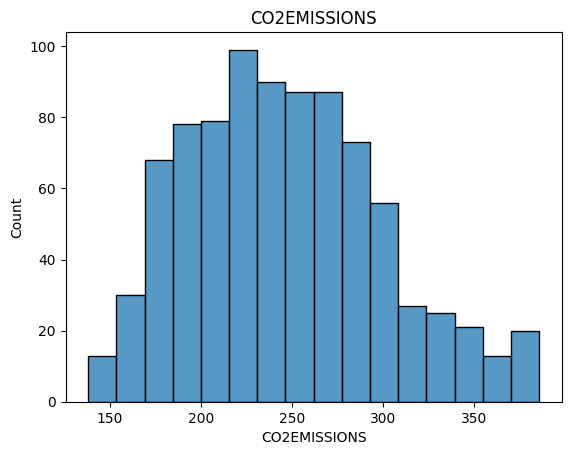

In [24]:
#Transformation
for i in num_cols:
  sns.histplot(df[i])
  plt.title(i)
  plt.show()

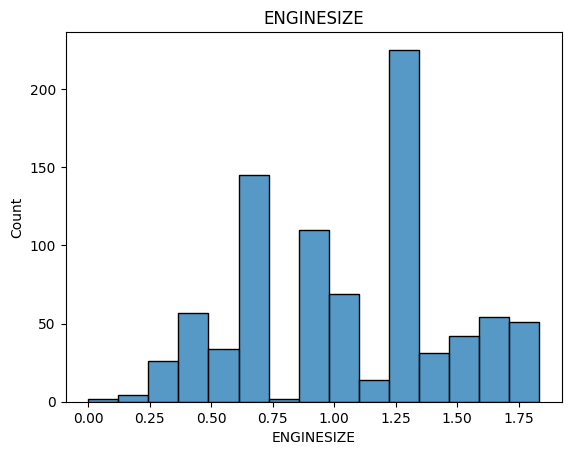

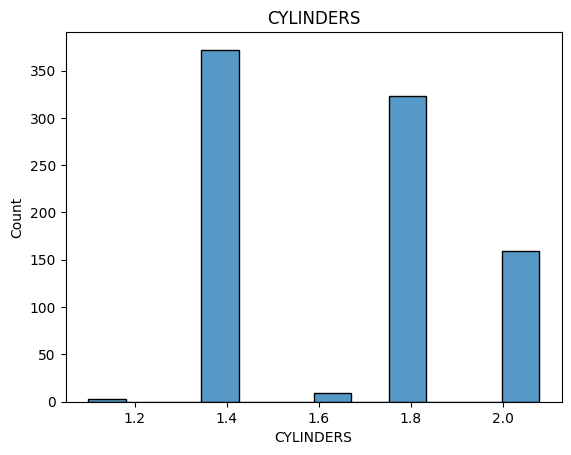

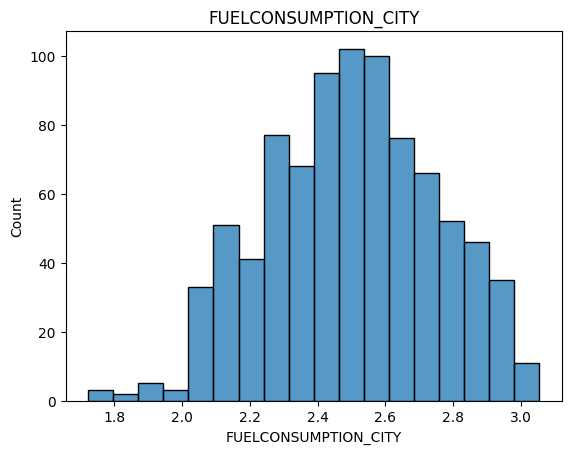

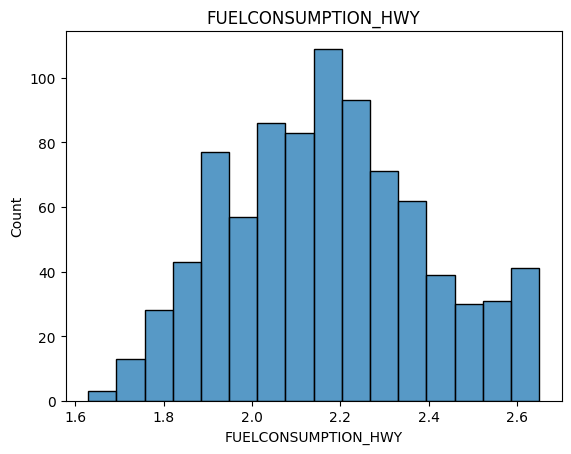

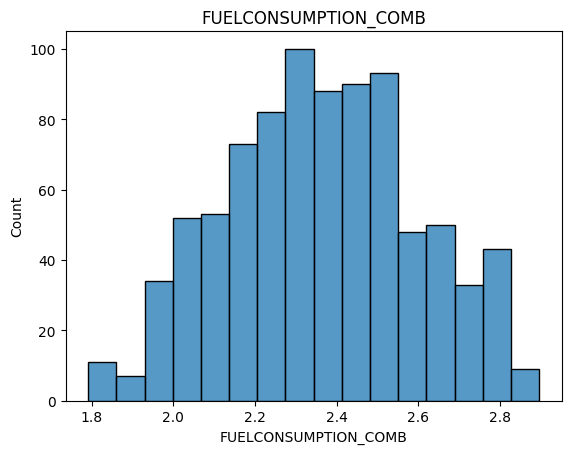

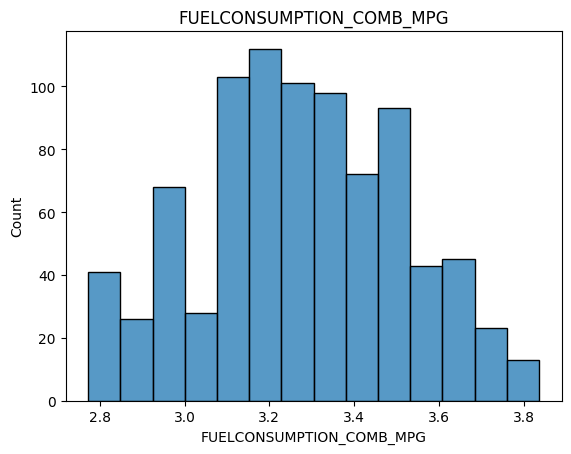

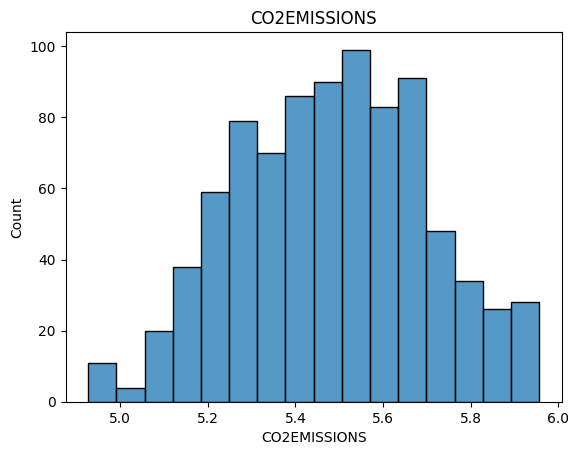

In [25]:
#histogram for all num columns
for i in num_cols:
  sns.histplot(np.log(df[i]))
  plt.title(i)
  plt.show()

In [26]:
df

,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33.0,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29.0,221
3,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25.0,255
4,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27.0,244
5,ACURA,MID_SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28.0,230
...,...,...,...,...,...,...,...,...,...,...,...
1061,VOLVO,SUV_SMALL,3.2,6,AS6,X,13.0,8.9,11.2,25.0,258
1062,VOLVO,SUV_SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24.0,271
1063,VOLVO,SUV_SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25.0,264
1065,VOLVO,SUV_SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25.0,260


<Axes: >

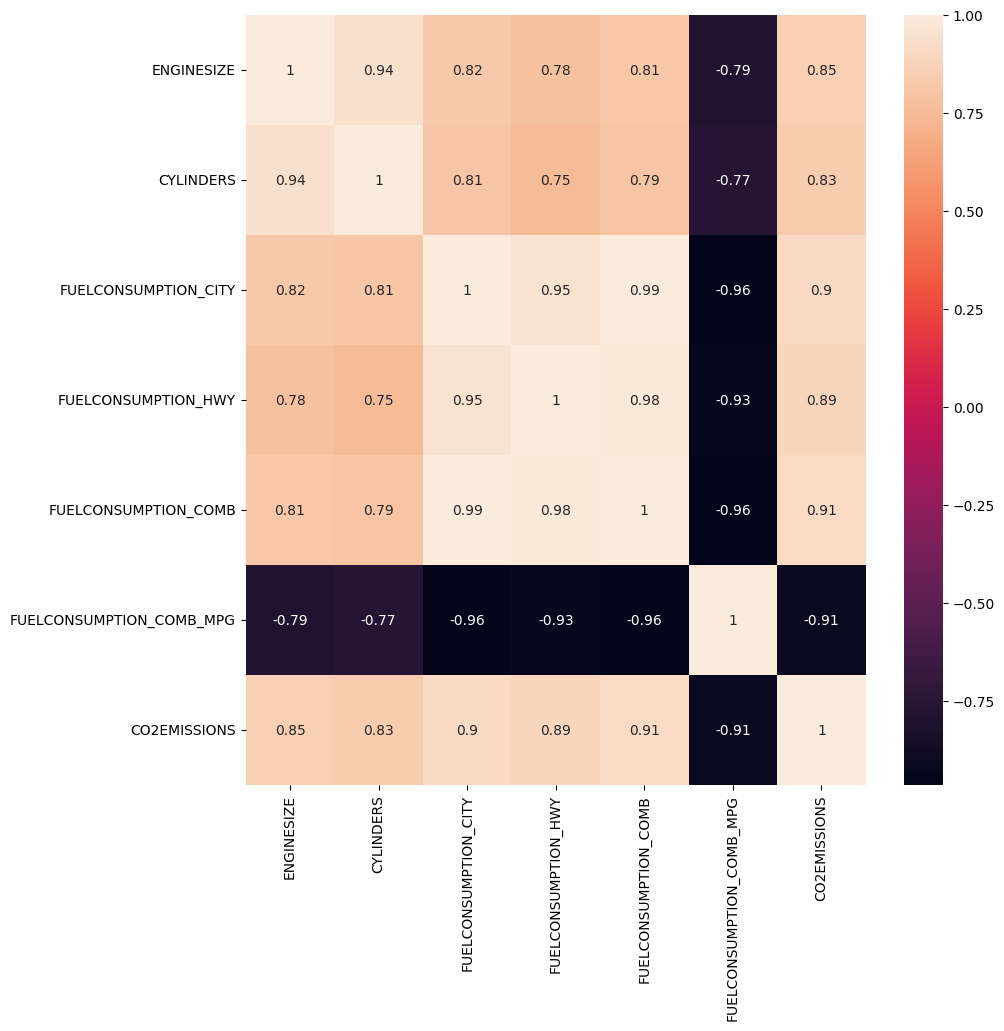

In [27]:
#heatmap for num columns
plt.figure(figsize=(10,10))
sns.heatmap(df[num_cols].corr(),annot=True)

In [28]:
X = df.drop(['CO2EMISSIONS'], axis=1)
y = df['CO2EMISSIONS'].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [30]:
X_train.shape , X_test.shape

((606, 10), (260, 10))

In [31]:
pip install tensorflow

In [34]:
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.compose import ColumnTransformer
 #Identify categorical columns from the original DataFrame before splitting
# This should still work as categorical_features is based on the original df
cat_cols = df.select_dtypes(include=['object']).columns

# Create a column transformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough' # Keep remaining numerical columns
)

# Apply the preprocessing to the training and testing sets (which are DataFrames here)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


scaler = MaxAbsScaler()
#Change the definition of the training set as a scaled version.
X_train = scaler.fit_transform(X_train_processed)
X_test = scaler.transform(X_test_processed)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Get the correct input dimension from X_train
input_dim = X_train.shape[1]   # = 79 after alignment
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),  # first hidden layer
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# Fit the model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          batch_size=128, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - loss: 63710.6016 - val_loss: 64802.6172
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 62929.7227 - val_loss: 64569.4609
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 64365.6875 - val_loss: 64297.0195
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 62145.2734 - val_loss: 63941.7539
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 60991.4180 - val_loss: 63464.1328
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 61079.3633 - val_loss: 62820.0352
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 61462.6562 - val_loss: 61959.0664
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 58735.8438 - val_loss: 60827.7891
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 58611.0820 - val_loss: 59365.0547
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 57549.4492 - val_loss: 57511.2578
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 55248.3477 - val_l

In [38]:
loss = pd.DataFrame(model.history.history)

<Axes: >

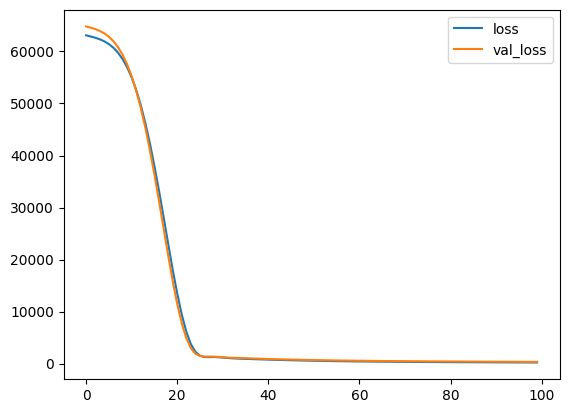

In [39]:
loss.plot()

In [40]:
predictions = model.predict(X_test)
predictions

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[224.81184],
       [206.9048 ],
       [162.55016],
       [238.988  ],
       [221.48567],
       [363.94595],
       [193.30708],
       [319.8096 ],
       [214.20213],
       [189.65273],
       [192.25954],
       [303.83548],
       [277.52032],
       [193.81071],
       [349.738  ],
       [162.0375 ],
       [212.02316],
       [207.98506],
       [312.17612],
       [369.17923],
       [251.56047],
       [266.90845],
       [235.3439 ],
       [233.62883],
       [247.26836],
       [302.18192],
       [275.7927 ],
       [232.2962 ],
       [190.72643],
       [290.75992],
       [164.35168],
       [292.4012 ],
       [266.43814],
       [277.55075],
       [250.07317],
       [270.09308],
       [217.39642],
       [244.22298],
       [215.66052],
       [253.14575],
       [268.70764],
       [226.87059],
       [231.47633],
       [266.8729 ],
       [277.7852 ],
       [233.49356],
       [258.2534 ],
       [281.2731 ],
       [271.87076],
       [265.05743],


In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

333.5730285644531

In [43]:
model.save("model.h5")   # يحفظ الموديل كامل (architecture + weights + optimizer state)
